First we start by importing all the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import pickle
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm


Then we import the clean dataset and we start with the data reading and exploration

In [2]:
df1 = pd.read_csv("/Users/clara/Documents/Ironhack/Finalproject/Data/clean/Clean_Dataset.csv")

In [3]:
df1.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


We drop the column "Unnamed" since it's unnecessary

In [4]:
df1.drop("Unnamed: 0", axis = 1, inplace = True)


In [5]:
df1.shape

(300153, 11)

In [6]:
df1.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
df1.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

We check for duplicates and null values

In [8]:
df1.duplicated().sum()


0

In [9]:
df1.isnull().sum().sum()

0

* We see that there are not duplicates nor missing values

In [10]:
df1.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Then we check for any possible outliers in the dataset
* We observe that we can't find any outliers

Now we check the correlation

In [11]:
df1.corr()

/var/folders/p0/lbhs9gv11lj5k_hv1w555fs40000gn/T/ipykernel_28696/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [12]:
df_grouped = df1.groupby(['flight', 'airline'], as_index = False).count()
df_grouped.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

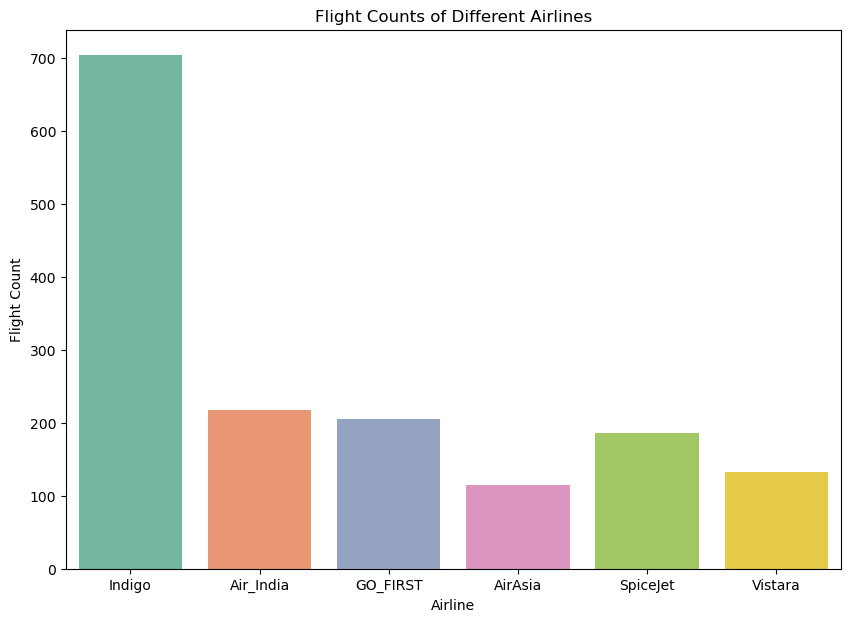

In [13]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df_grouped.airline,palette= "Set2")
plt.title('Flight Counts of Different Airlines')
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/flights_number_per_airline.png')
plt.show();

* We observe that amongst all the airlines, Indigo is the most popular airline, the one with most number of flights.

In [14]:
df_grouped2 = df1.groupby(['flight', 'airline','class'], as_index = False).count()
df_grouped2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

In [15]:
df1['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

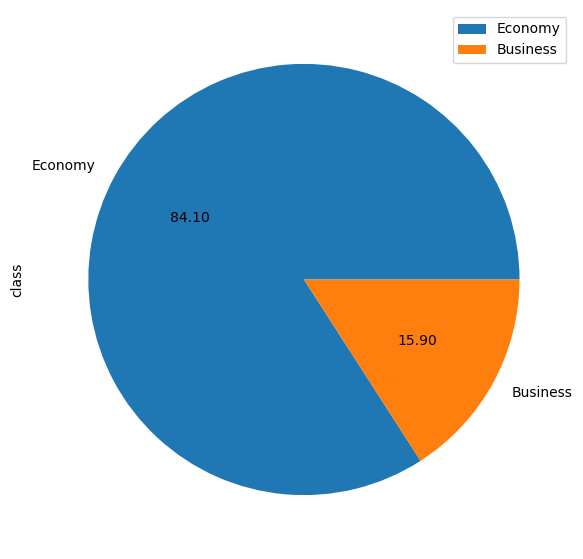

In [16]:
plt.figure(figsize = (10,7))
df_grouped2['class'].value_counts().plot(kind = 'pie', autopct = "%.2f")
plt.legend(['Economy','Business'])
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/classes.png')
plt.show()

* The Economy class makes the 84,1 % of the total tickets, whereas Business only represents 15,9% 

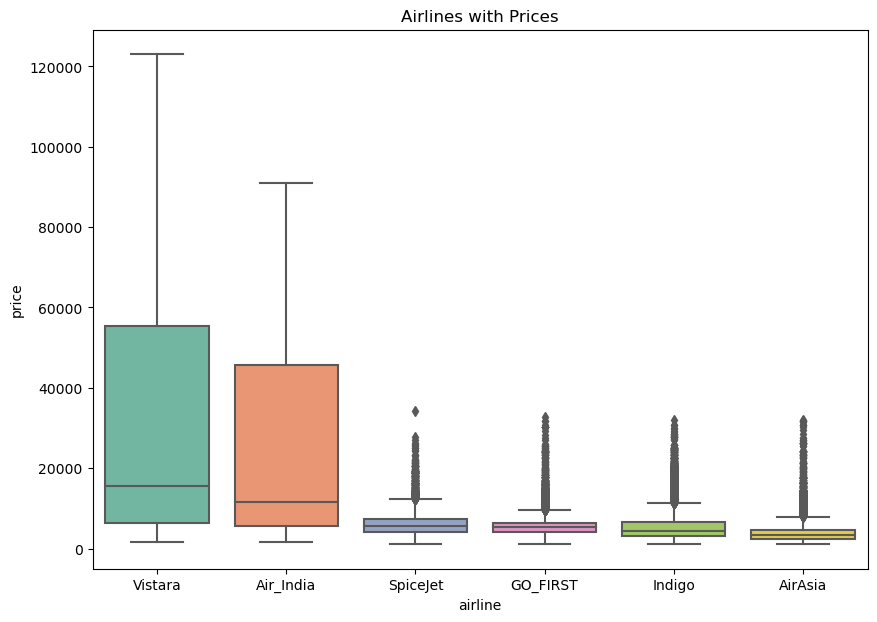

In [17]:
plt.figure(figsize = (10,7))
sns.boxplot(data=df1.sort_values("price", ascending = False), y = "price", x = "airline",palette= "Set2")
plt.title("Airlines with Prices")
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/airlines_prices.png')
plt.show()


* Visitara and Air India are more expensive airlines compared to the other ones
* Air Asia is the cheapest airline of them all

In [18]:
df1[df1['price'] == df1['price'].max()]


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [19]:
df1[df1['price'] == df1['price'].min()]


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


* The most expensive flight ticket is to Kolkata to Delhi with Visitara, at a price of 123071 Rupees (1.451,39 euros aprox)
* There is a large number of cheap flights, whose price start at 1105 Rupees (13,03 euros)

How the ticket price changes based on the departure time and arrival time?


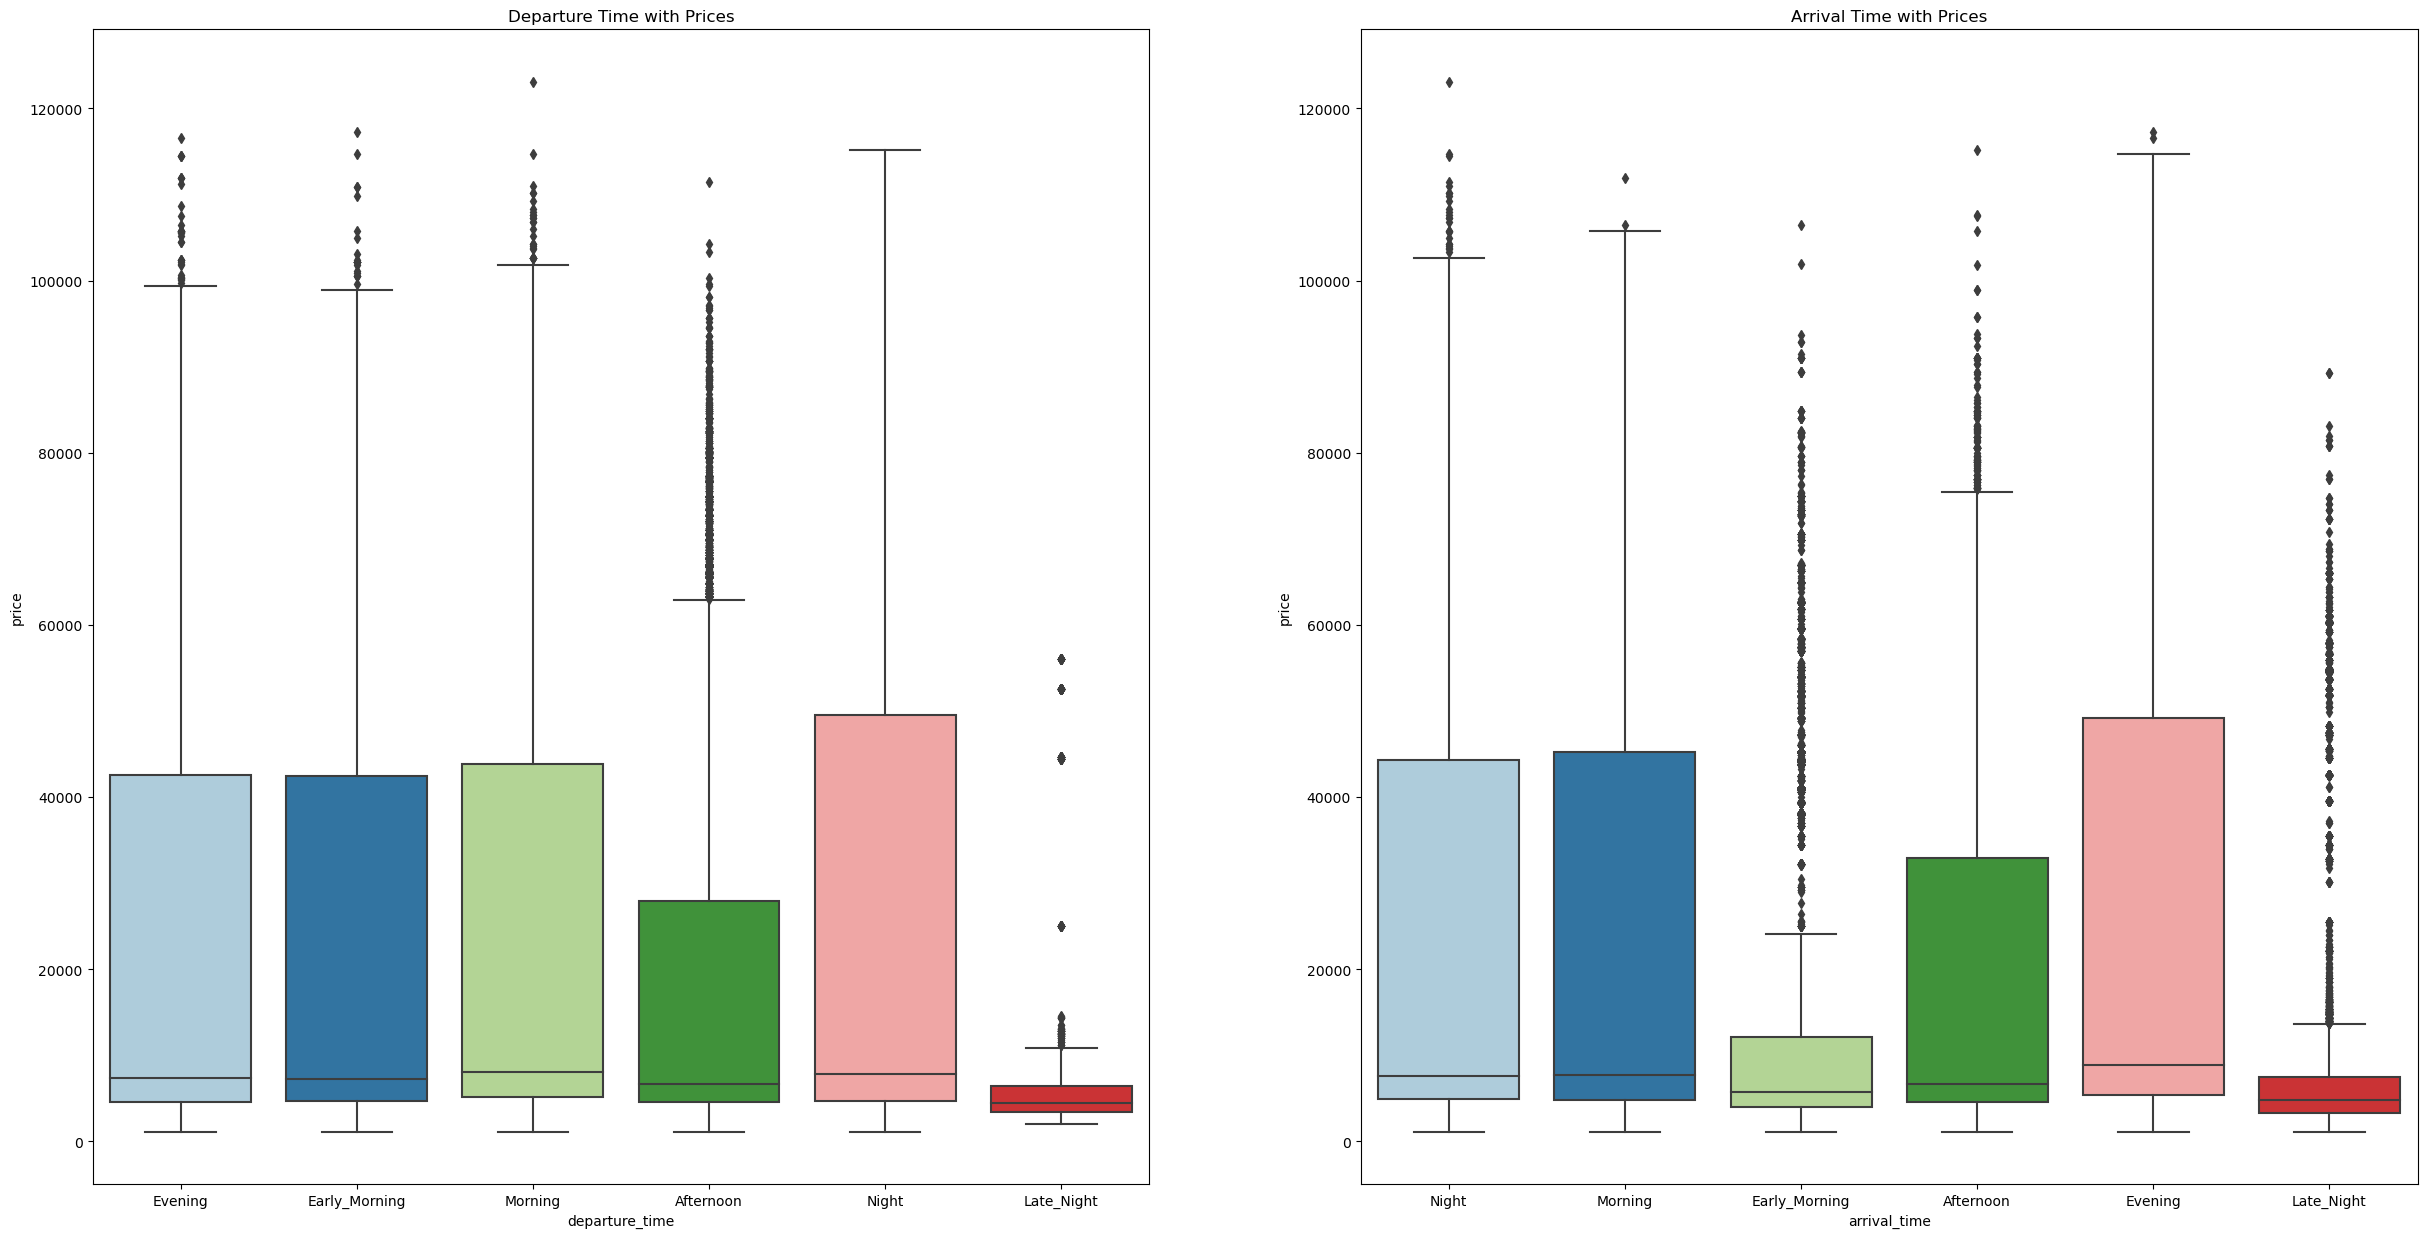

In [20]:
plt.figure(figsize = (30,15))

plt.subplot(1,2,1)
sns.boxplot(data=df1, x="departure_time", y="price", palette='Paired')
plt.title("Departure Time with Prices")
plt.subplot(1,2,2)

sns.boxplot(data=df1, x="arrival_time", y="price",palette='Paired')
plt.title("Arrival Time with Prices")

plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/arrival_vs_departure_prices.png')

plt.show()

* Ticket Price is more expensive for the flights departing at Night
* Ticket Price is almost equal for flights departing at Early_morning , Morning and Evening
* Ticket Price is Low for the flights departing at Late_night
* Ticket Price is More for the flights arriving at Evening
* Ticket Price is similar for flights arriving both at Morning and Night

The more stops the more expensive flights get?


In [21]:
df1['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

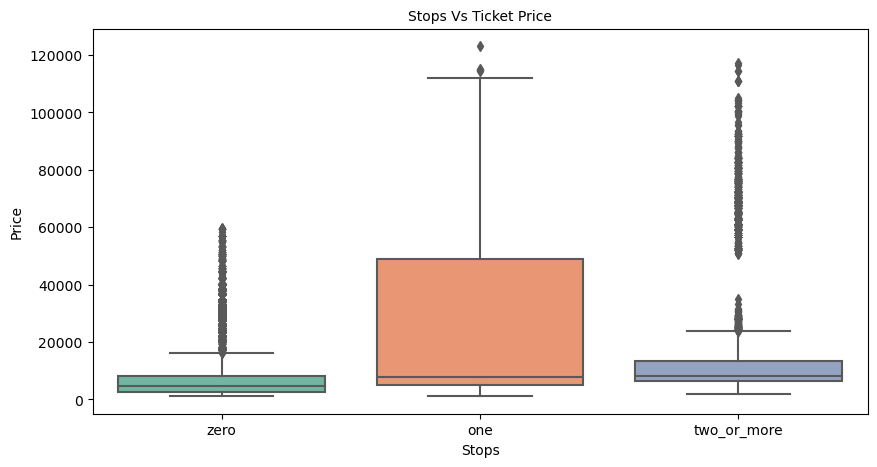

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df1, palette='Set2')
plt.title('Stops Vs Ticket Price',fontsize=10)
plt.xlabel('Stops',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/stop_vs_price.png')
plt.show()

* The flights are the most expensive when there's 1 stop involved

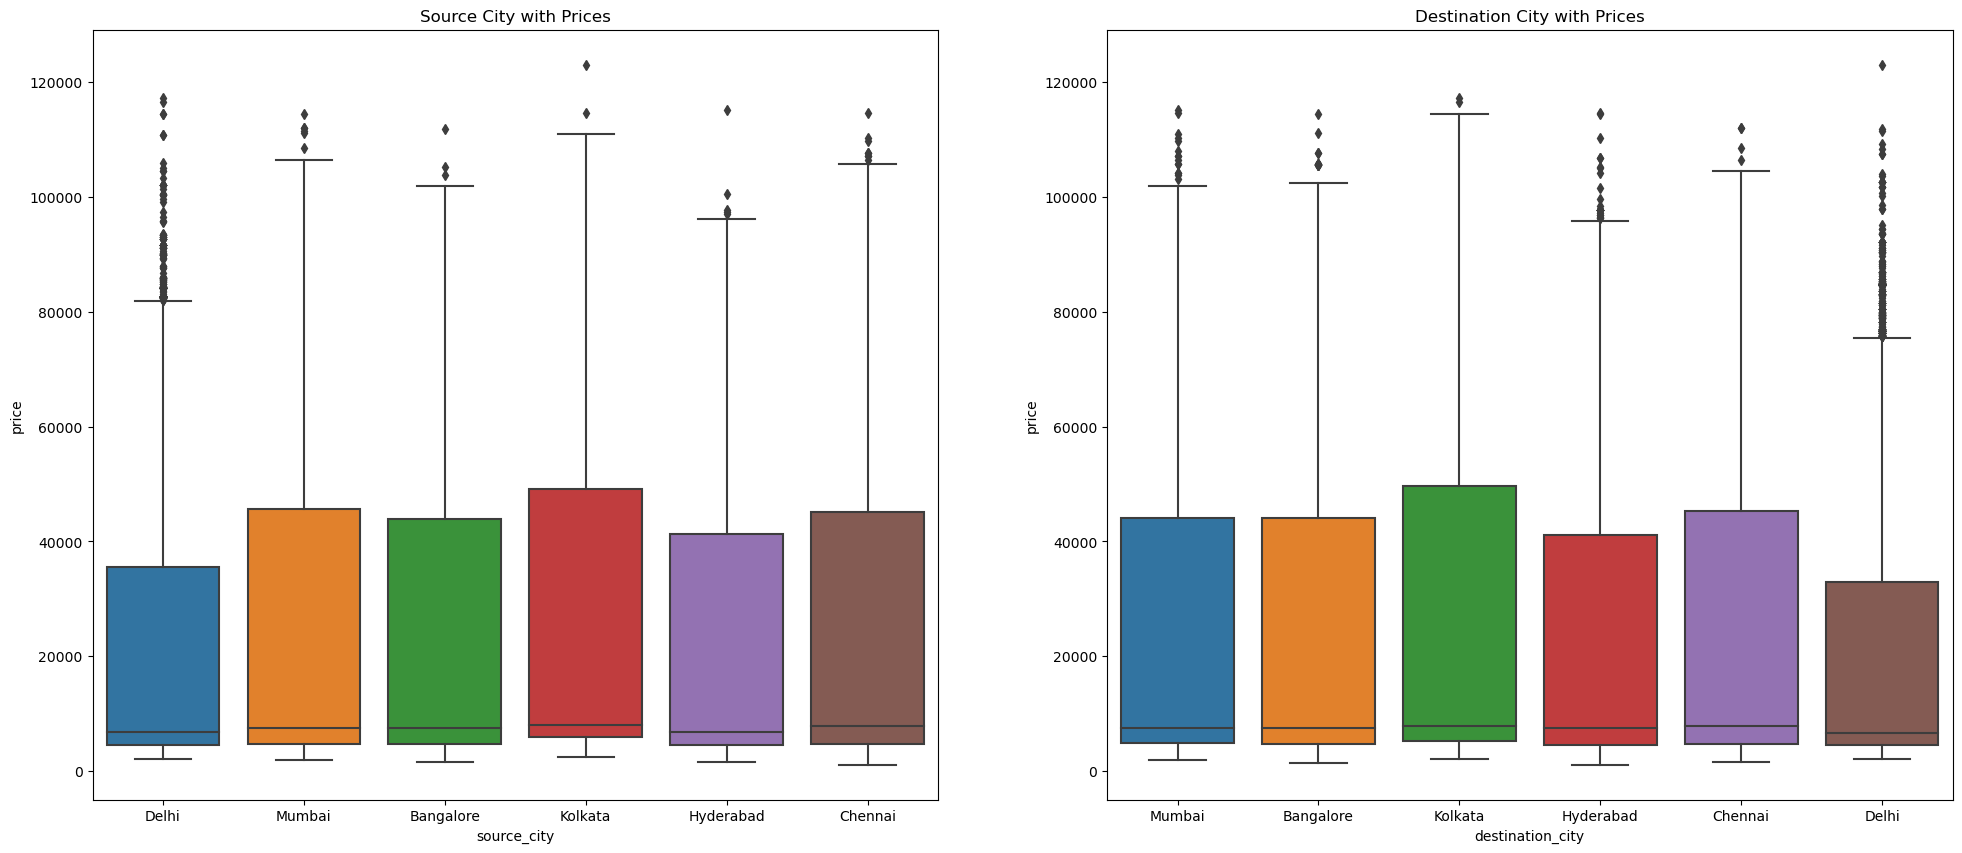

In [23]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=df1, x="source_city", y="price", palette= "tab10")
plt.title("Source City with Prices")
plt.subplot(1,2,2)
sns.boxplot(data=df1, x="destination_city", y="price", palette= "tab10")
plt.title("Destination City with Prices")
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/source_vs_destination_prices')
plt.show()

* The most expensive flight destination is Kolkata, the least expensive is Delhi


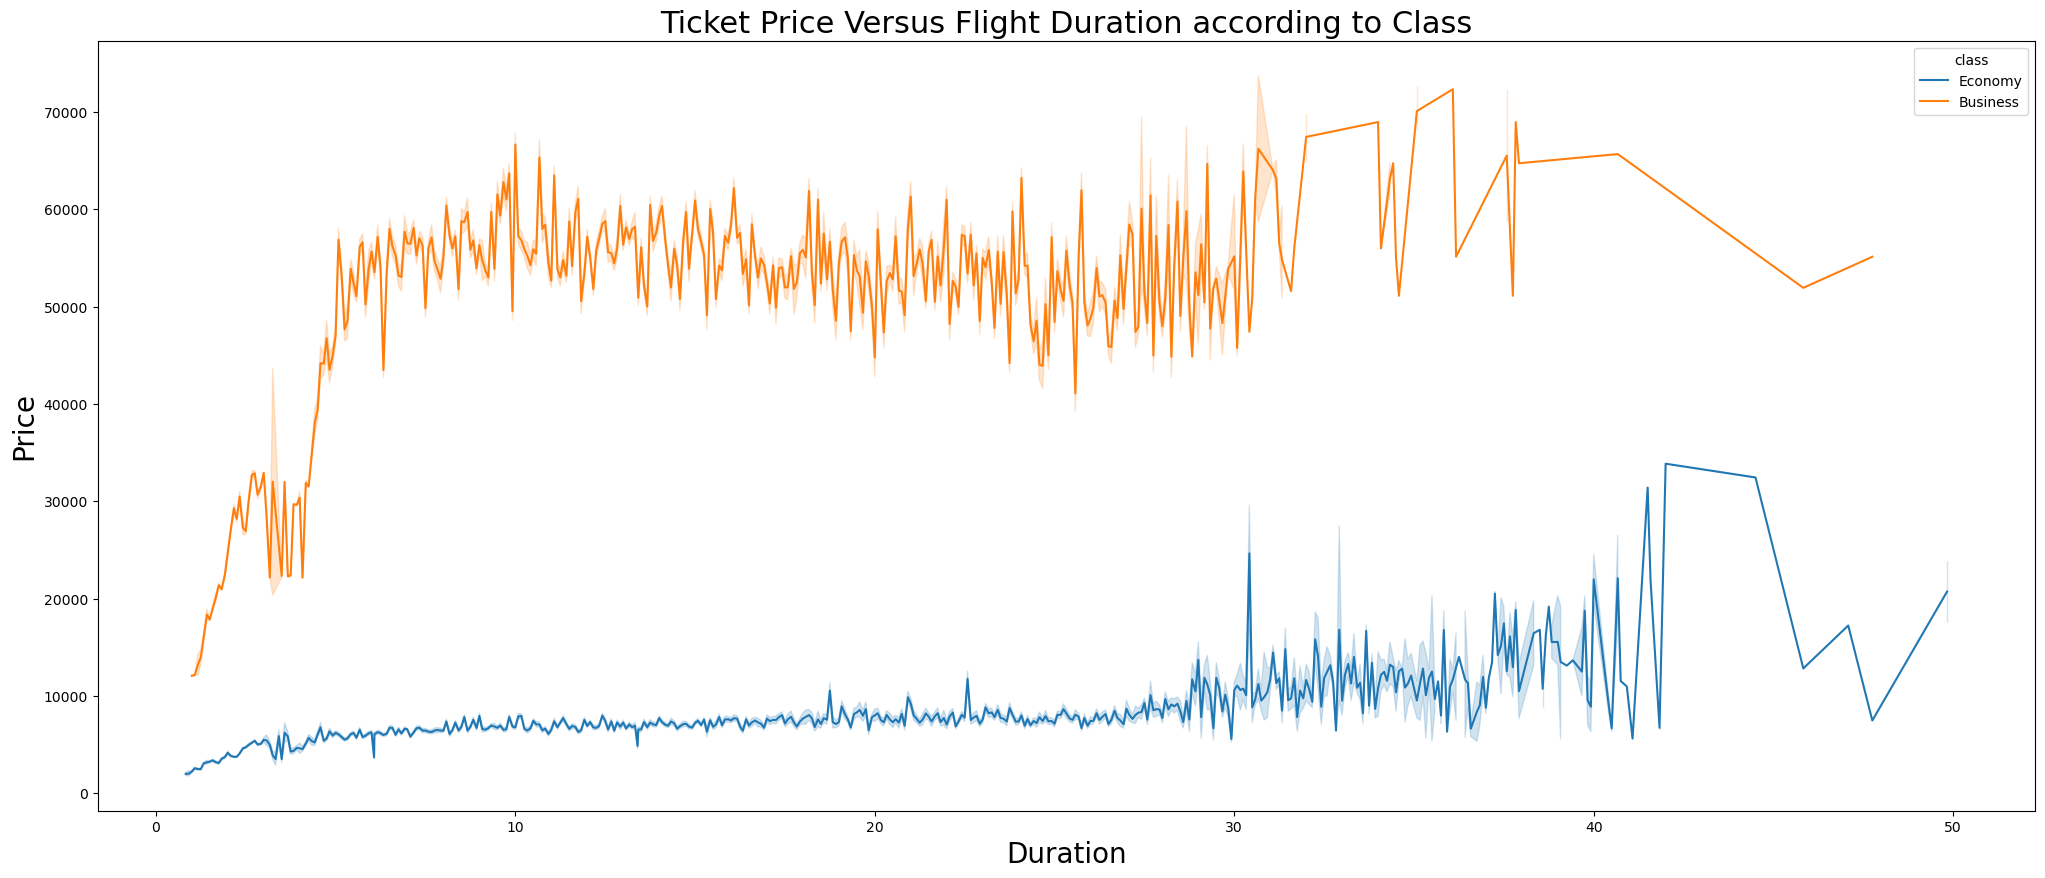

In [24]:
plt.style.use
plt.figure(figsize=(25,10))
sns.lineplot(data=df1,x='duration',y='price',hue='class',palette='tab10')
plt.title('Ticket Price Versus Flight Duration according to Class',fontsize=22)
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/class_price_difference.png')
plt.show()

We observe that both classes experience a rise on the ticket price when the flight is longer than 30 minutes

In [25]:
df1['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [26]:
df1.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


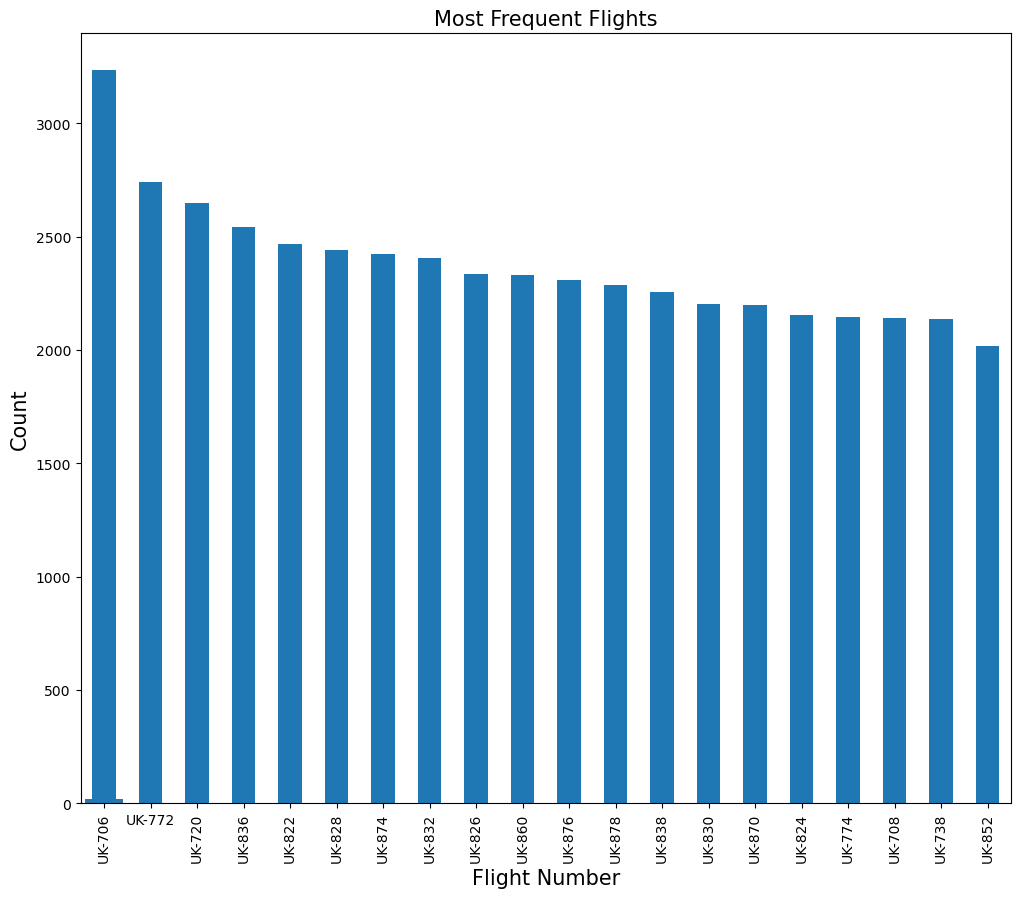

In [27]:
flightnumber = df1.flight.value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.countplot(flightnumber, palette='tab10')
flightnumber.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Flight Number',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/most_frequent_flights.png')
plt.show()

* Most frequent flight is from Delhi to Mumbai

In [28]:
df1.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


<Figure size 2500x1000 with 0 Axes>

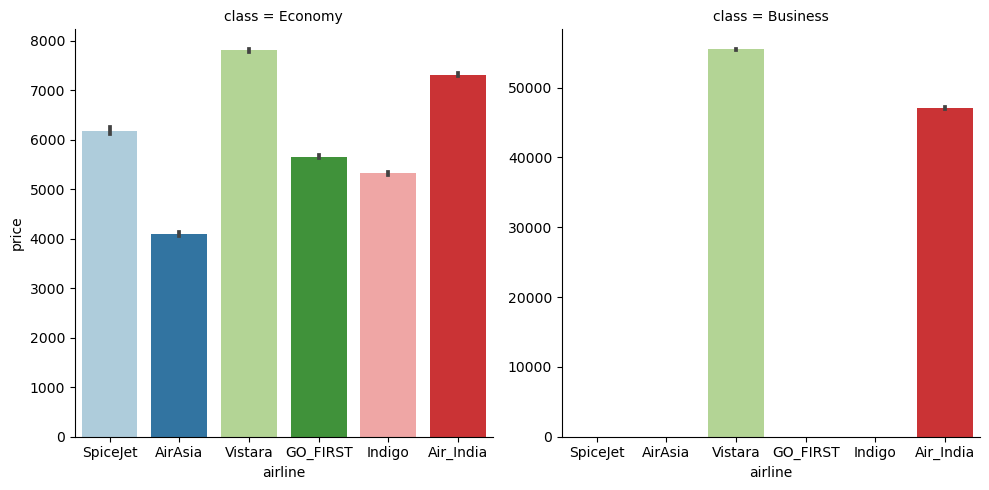

In [29]:
plt.figure(figsize=(25,10))    
sns.catplot(y='price', x='airline', data=df1, kind='bar',col='class',sharey=False, palette='Paired')
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/airlines_by_classes.png')
plt.show()

* Business flights are only available in Air India and Vistara.
The Price gap between the two types of classes is huge, the Business flights cost nearly five more times than the Economy ones.

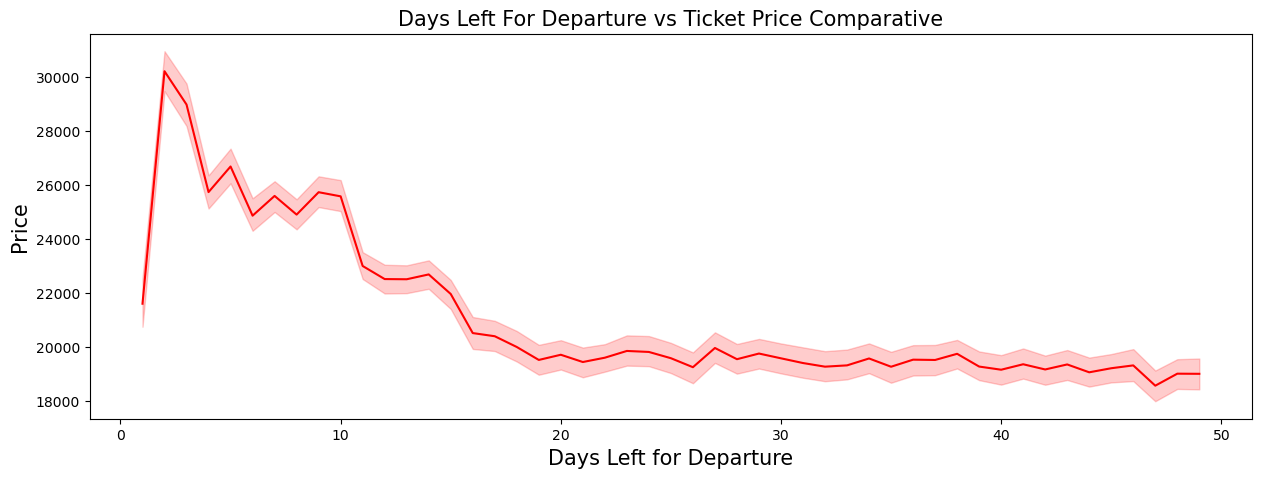

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='days_left',y='price',color='red')
plt.title('Days Left For Departure vs Ticket Price Comparative',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/daysleft_vs_price.png')
plt.show()

* The ticket prices are higher as the date before departure approaches.
